In [3]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math
from scipy import constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (20,6)
import os
import sys
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad
import shutil
import scienceplots 
plt.style.use(['science', 'notebook', 'grid'])

print (time.ctime())

Mon Dec 26 21:48:42 2022


In [4]:
def exp(t, a, b, T):
    return a*(1-b*np.exp(-t**2/T**2))
def inv_exp(t, a, b, T, t_o):
    return a*(1-b*np.exp(-(abs(t-t_o))/T))
def asymptotic(t, a, b, t_o):
    return a*(1-(b*t_o)/abs(t))

In [5]:
def cut(data, start, stop):
#     data['CH2(V)'].mean()
    
    # cut data before pulse
    data_cut  = data[(data['Time(s)'] > start) & (data['Time(s)'] < stop)]  
    
    # find Y mean of data before pulse
    data_cut.mean()[1]
    
    # Subtract Y mean of data before pulse from total Y data
    data_y_avg = data['CH2(V)'] - data_cut.mean()[1]

    # data_y_avg.shape

    # type(data_y_avg)

    return data_y_avg

In [6]:
def dfconcat(data_1, data_2, start, stop):
    # Combine new averaged Y data with original X data
    data_new = pd.concat([data_1['Time(s)'], data_2], axis=1)
    
    # Remove all data before pulse
#     data_pulse  = data_new[data_new['Time(s)'] > (1.235*(10**(-6)))] 
    data_pulse  = data_new[(data_new['Time(s)'] > start) & (data_new['Time(s)'] < stop)]

    # data_pulse.shape
    return data_pulse

In [7]:
# data2 = cut(data, data['Time(s)'].min(), 0-(5000*(10**(-6))))
# data3  = dfconcat(data, data2, 0-(4950*(10**(-6))), 0-20*10**-6)

In [8]:
def fit(data, file, npy_dir, func, num, temp, pol, brand):
    fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
#     T=-(10*10**(-6))
#     t_o=-(1*10**(-6))
    best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 0.8,0.00001], bounds=((0,0,0),(5.0, 0.9,0.001)))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 0.8, 10*10**(-6), 10*10**(-6)], bounds=((0,0.7,0,0),(5.0, 0.9, 0.002, 1*10**(-3))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))-(4950*(10**(-6))),(1*10**(-6))-(4950*(10**(-6)))], bounds=(0,(5.0,1.0,0.002,1*10**(-5))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))+offset,(1*10**(-6))+offset], bounds=((0,0,0.002+offset-p,(1*10**(-5))+offset-p),(5.0,1.0,0.002+offset,(1*10**(-5))+offset)))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, T, t_o], bounds=(-np.inf,(0,0,0,0)))    
    print(best_vals, covar)

    ax.plot(data['Time(s)'], data['CH2(V)'], '-')

#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:a-b*e^(-(t-t_o)/T)\n a=%5.4f, b=%5.4f, T=%5.7f, t_o=%5.6f' % tuple(best_vals))
#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:a-b*e^(-(t-t_o)/T)\n a=%5.4f, b=%5.4f, t=%5.6f t_o=%5.6f' % tuple(best_vals))
    ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:a*(1-(b*t_o)/abs(t))\n a=%5.4f, b=%5.4f, t_o=%5.6f' % tuple(best_vals))
#     ax.set_title('Optical Pumping, Lin Pol, '+str((num+1)*100)+'uW, 5 ms, Rb @ 40 C')
#     ax.set_title('Optical Pumping, '+pol+' Pol, '+str((num+1)*100)+'uW, 5 ms, Rb @ '+temp+' C')
    ax.set_title('Optical Pumping, '+pol+' Pol, '+str(num)+'uW, 5 ms, Rb @ '+temp+' C') #ThorCIRC60C
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Volts (V)', fontsize=12)
    plt.legend(loc='lower right')
    plt.savefig(file[:-4]+'fit.png')

    np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+brand+pol+temp+'_best_vals.npy', best_vals)
    np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+brand+pol+temp+'_covar.npy', covar)
    return None

In [9]:
# BRANDLONG = 'PrecisionGlassBlowing'
# BRAND='PGB'

# POL='LIN'

# TEMP='60'

In [10]:
# os.mkdir("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/npy_files")

In [11]:
# ext = '.npy'
# cwd = os.getcwd()
# files = [ f for f in os.listdir( cwd ) if os.path.isfile(f) and f.endswith(ext) ]

In [12]:
# file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/npy_files/")
         
# # os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

# for num in range(50):
#     best = POL+'700uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy'
#     cov = POL+'700uW'+str(num)+'_'+BRAND+POL+TEMP+'_covar.npy'
#     if best in files:
#             shutil.move(os.getcwd()+'/'+best, file1+best)
#     if cov in files:
#             shutil.move(os.getcwd()+'/'+cov, file1+cov)

In [13]:
# ThorLIN60pwrs = [*range(100, 2400, 100)] #ThorLIN60


# file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/npy_files/")
         
# # os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")

# for num in ThorLIN60pwrs:
#     best = POL+str(num)+'uW'+str(0)+'_'+BRAND+POL+TEMP+'_best_vals.npy'
#     cov = POL+str(num)+'uW'+str(0)+'_'+BRAND+POL+TEMP+'_covar.npy'
#     if best in files:
#             shutil.move(os.getcwd()+'/'+best, file1+best)
#     if cov in files:
#             shutil.move(os.getcwd()+'/'+cov, file1+cov)

/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/PrecisionGlassBlowing/CIRCPOL/60C_Phase_Locked_2/CIRC3650uW0.csv
Mon Dec 26 21:49:06 2022
[3.60736478e-02 8.02519194e-01 9.60556532e-05] [[1.32485769e-13 1.66150834e-19 1.38814388e-15]
 [1.66150834e-19 8.06890909e-25 6.74135473e-21]
 [1.38814388e-15 6.74135473e-21 5.63221906e-17]]
/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/PrecisionGlassBlowing/CIRCPOL/60C_Phase_Locked_2/CIRC3650uW1.csv
Mon Dec 26 21:49:09 2022
[1.30775479e-01 8.37373217e-01 3.10217620e-05] [[1.44538909e-12 1.73305395e-19 4.67818951e-15]
 [1.73305395e-19 6.44971388e-26 1.74099403e-21]
 [4.67818951e-15 1.74099403e-21 4.69952664e-17]]
/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/PrecisionGlassBlowing/CIRCPOL/60C_Phase_Locked_2/CIRC3650uW2.csv
Mon Dec 26 21:49:12 2022
[5.12546199e-03 4.31989409e-01 1.15975972e-04] [[3.29082462e-14 1.31801101e-18 4.90935131e-15]
 [1.31801101e-18 1.80651732e-22 6.72894853e-19]
 [4.90935131e-

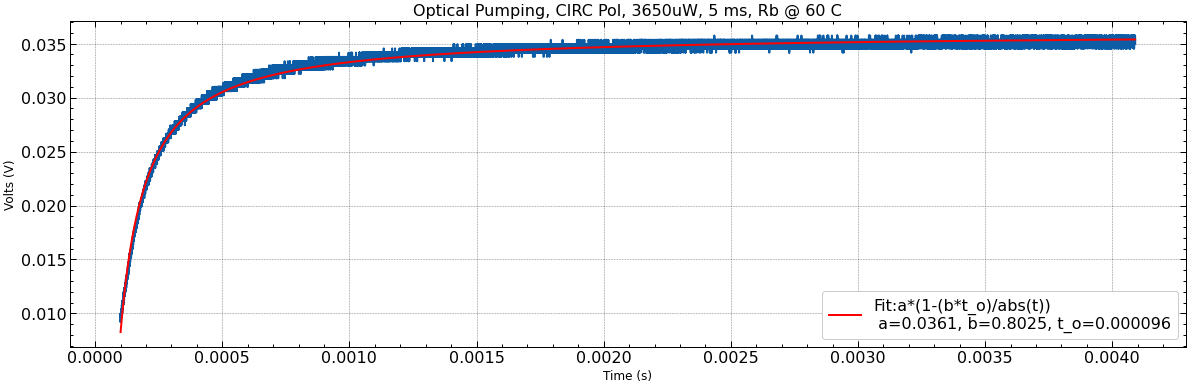

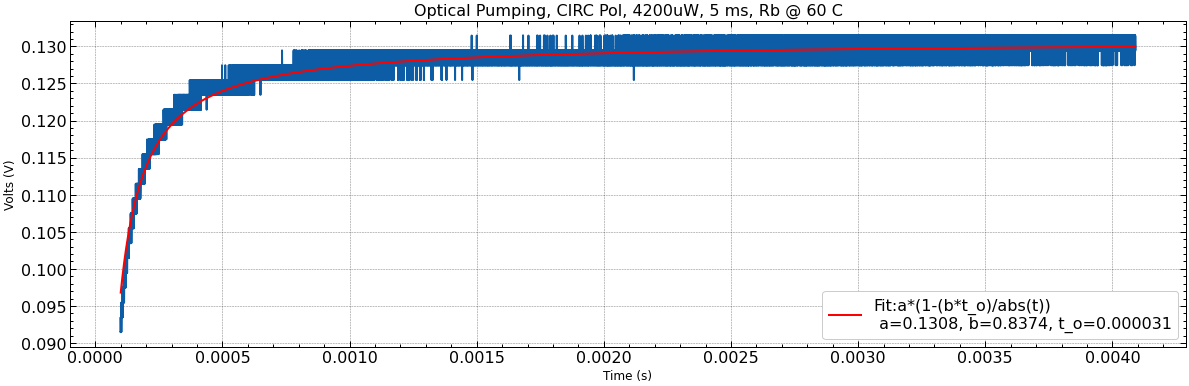

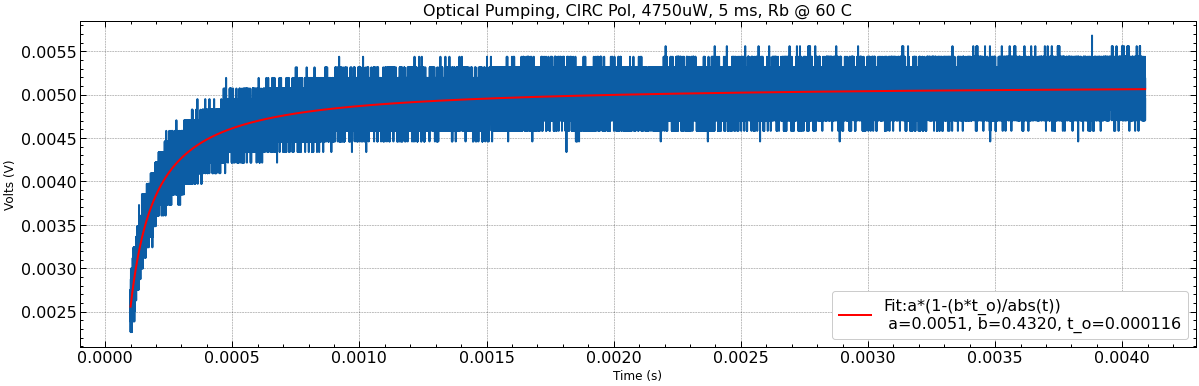

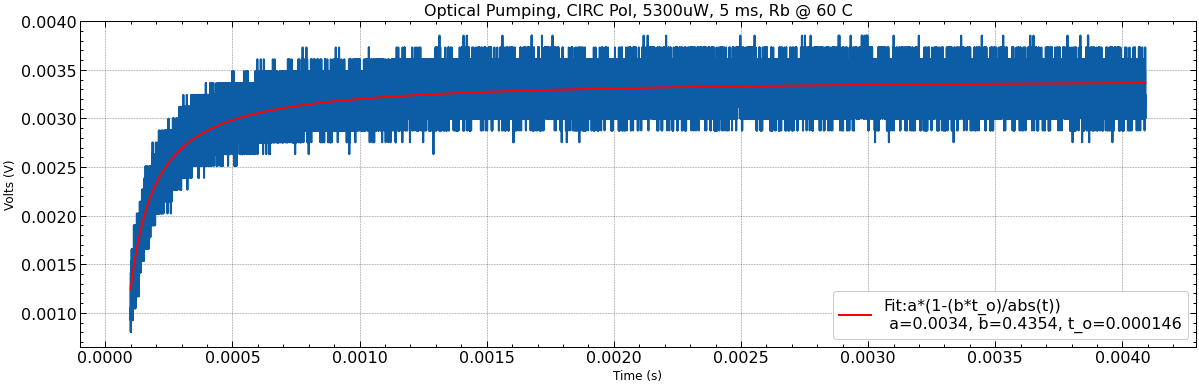

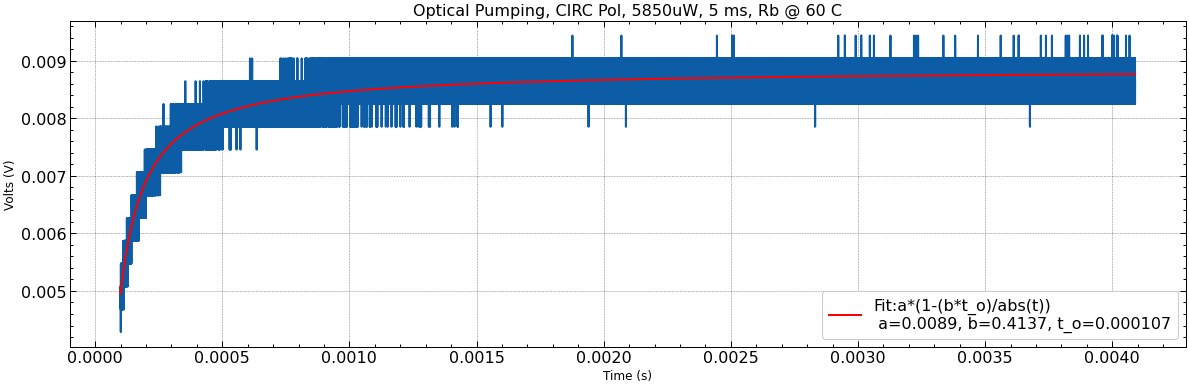

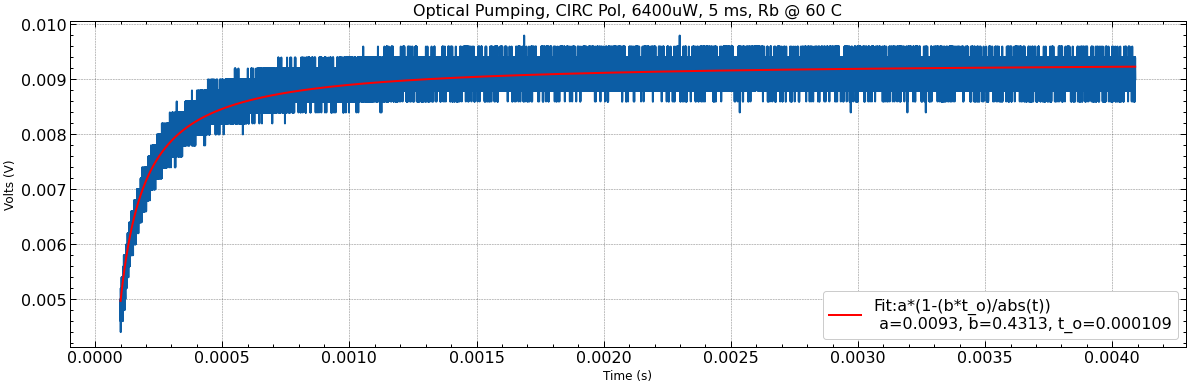

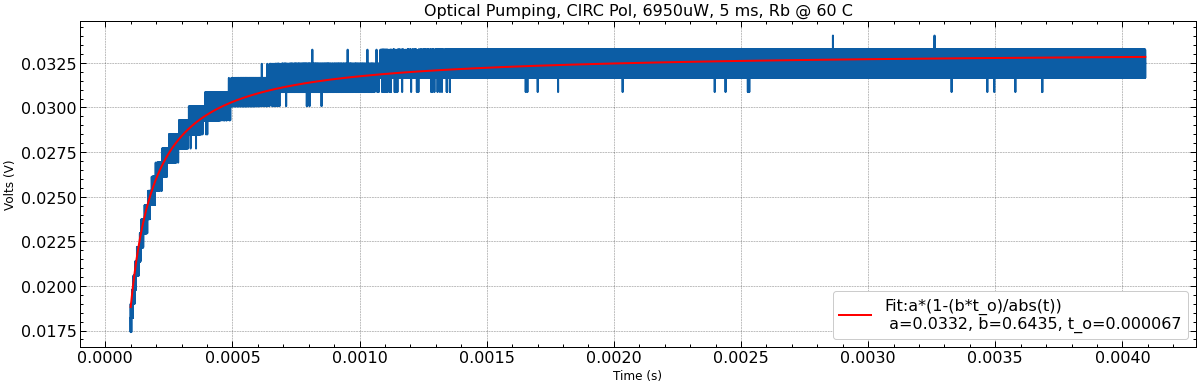

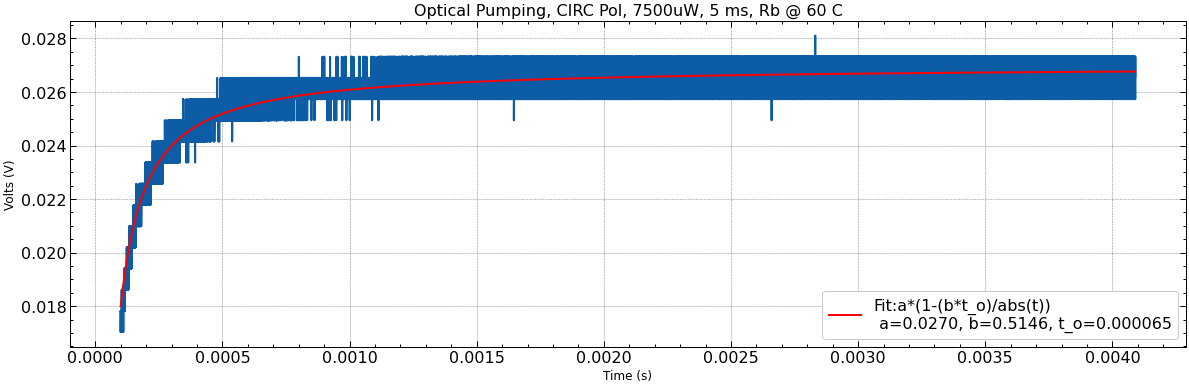

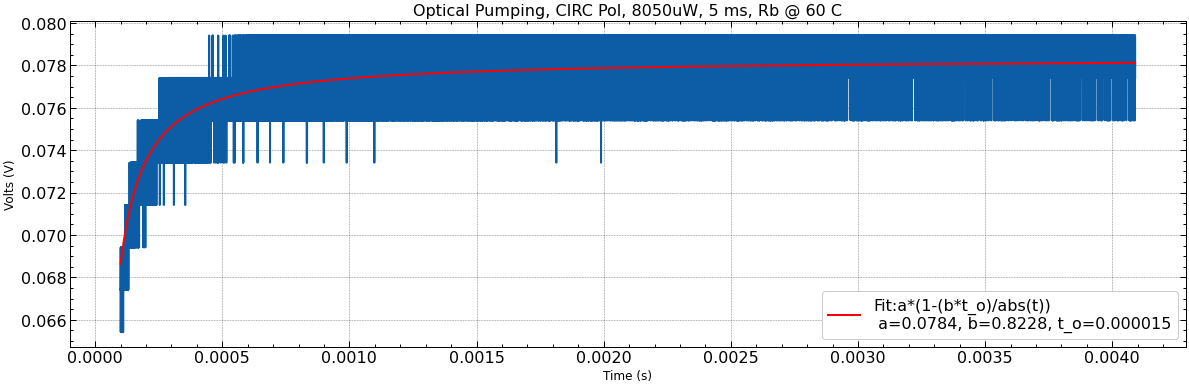

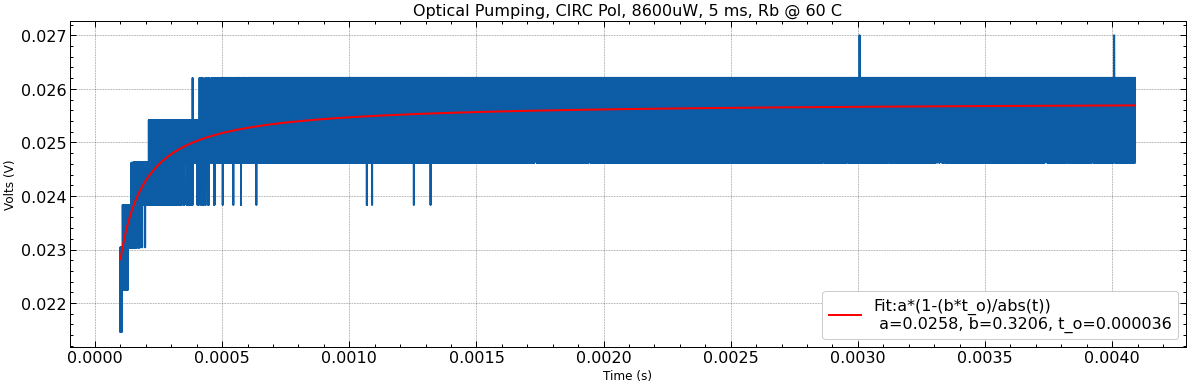

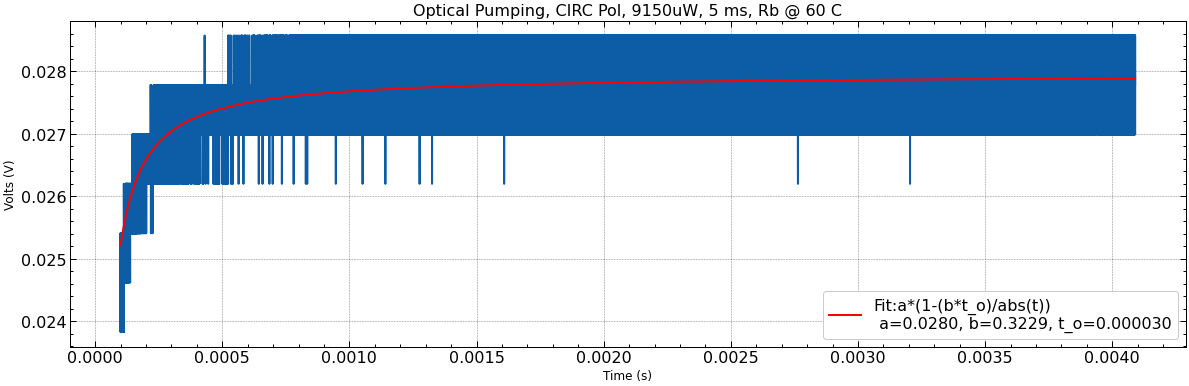

In [15]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
POL = 'CIRC'
TEMP = '60' 

# pwrs = [int(x) for x in np.linspace(2000,7500,11)]
# pwrs = [int(x) for x in np.linspace(200, 9000, 11)]
pwrs = [int(x) for x in np.linspace(3650, 9150, 11)]

# make new folder if not exists
npydir = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/npy_files")
if not os.path.exists(npydir):
    os.mkdir(npydir)

# filenums = [500, 540, 580, 620, 660, 700, 740, 780, 820, 860,900,940,980,1200,1600,2000,2400]
# filenums = [900,940,980,1200,1600,2000,2400]
# filenums = [*range(1540,1620, 40)]
# filenums = [*range(100,5700, 100)] #LINPOL3
# filenums = [*range(100,2400, 100)] #LINPOL2
# n = [20 , 60 , 100 , 140 , 180 , 220 , 260 , 300 , 340 , 380 , 420 , 460 , 500 , 540 , 580 , 620 , 660 , 700 , 740 , 780, 
#       820 , 860 , 900 , 940 , 980 , 1020 , 1060 , 1100 , 1140 , 1180 , 1220 , 1260 , 1300 , 1340 , 1380 , 1420 ,
#      1460 , 1500 , 1540 , 1580, 1620 , 1660 , 1700 , 1740 , 1780 , 1820 , 1860 , 1900 , 1940 , 1980 , 2020] #ThorCIRC60C


for num in range(11):
    # file1 = "/mnt/c\QuantumRouter\Magnetometery\OPscopetraceCircPol\circ2_3mW0.csv"
#     file1 = "/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/LINPOL3/60C0dB/LIN"+str(filenum)+"uW0.csv"
    # file1 = file1.replace("\\", "/")
#     file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              "Thorlabs/LINPOL/40C/LIN100uW"+str(filenum)+".csv")
    file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/"+POL+str(3650)+"uW"+str(num)+".csv")
    print(file1)
    # print(time.ctime())
    data1 = pd.read_csv(file1)
    # print(pd.read_csv(file1, nrows=5))
    # print("Shape:")
    # print(data1.shape)
    # print("Dtypes:")
    # print(data1.dtypes)
    print(time.ctime())
    
    #  Params for datasets 5-10
#     data2 = cut(data, data['Time(s)'].min(), 0)
#     data3  = dfconcat(data, data2, 0+40*10**-6, 4090*10**-6)
#   40C Phase Lock PGB
#     data2 = cut(data1, data1['Time(s)'].min(), 0)
#     data3  = dfconcat(data1, data2, 1.235*(10**(-6)), 4090*10**-6)
    
    data2 = cut(data1, data1['Time(s)'].min(), 0)
    
    data3  = dfconcat(data1, data2, 100*(10**(-6)), 4090*10**-6)
    
    fit(data3, file1, npydir, asymptotic, pwrs[num], TEMP, POL, BRAND)

In [ ]:
# pwr_nums = [500, 540, 580, 620, 660, 700, 740, 780, 820, 860,900,940,980,1200,1600,2000,2400]
# pwr_nums = [*range(500,2060, 40)]
# pwr_nums = [*range(100,2400, 100)] #LINPOL2
# pwr_nums = [*range(100,5700, 100)] #LINPOL3
pwr_nums = [*range(100,5700, 100)] 
T_list = [] 

for num in filenums:
    T_list.append(np.load(POL+str(100)+'uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
#     T_list.append(np.load("LIN"+str(num)+'uW_ThorLIN40_best_vals.npy')[2])
print(T_list)

len(T_list), len(pwr_nums)

# T_list.pop(0), pwr_nums.pop(0)

fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(pwr_nums,T_list, '-')

ax.set_xlabel('Power (uW)', fontsize=12)
ax.set_ylabel('T (s)', fontsize=12)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(pwr_nums)
ax.set_xticklabels(pwr_nums,rotation=45)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.set_title('Time Constant vs. Input Power\n'+TEMP+' C, '+POL+' Pol')
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"+BRANDLONG+"/"+POL+"POL/"+TEMP+"C/TvPwr_100uWto5600uW.png")

In [ ]:
# pwr_nums = [500, 540, 580, 620, 660, 700, 740, 780, 820, 860,900,940,980,1200,1600,2000,2400]

BRANDLONG = 'Thorlabs'
BRAND='Thor'


POL='CIRC'

TEMP='35'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='40'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='60'
globals()[BRAND+POL+TEMP+'_T_list'] = []
n = [20 , 60 , 100 , 140 , 180 , 220 , 260 , 300 , 340 , 380 , 420 , 460 , 500 , 540 , 580 , 620 , 660 , 700 , 740 , 780, 
      820 , 860 , 900 , 940 , 980 , 1020 , 1060 , 1100 , 1140 , 1180 , 1220 , 1260 , 1300 , 1340 , 1380 , 1420 ,
     1460 , 1500 , 1540 , 1580, 1620 , 1660 , 1700 , 1740 , 1780 , 1820 , 1860 , 1900 , 1940 , 1980 , 2020] #ThorCIRC60C
for num in n:
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+str(num)+'uW'+str(0)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))


POL='LIN'

TEMP='35'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='40'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(100, 5700, 100):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+str(num)+'uW_'+BRAND+POL+TEMP+'_best_vals.npy')[2]) #ThorLIN40
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='60'
globals()[BRAND+POL+TEMP+'_T_list'] = []
ThorLIN60pwrs = [*range(100, 2400, 100)] #ThorLIN60
for num in ThorLIN60pwrs:
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+str(num)+'uW'+str(0)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

In [95]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND='PGB'


POL='CIRC'

TEMP='35'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='40'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='60'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(55):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'200uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))


POL='LIN'

TEMP='35'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='40'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(56):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'100uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

TEMP='60'
globals()[BRAND+POL+TEMP+'_T_list'] = []
for num in range(50):
    globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(POL+'700uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
print(len(globals()[BRAND+POL+TEMP+'_T_list']))

56
56
55
56
56
50


Text(0.5, 1.0, 'Time Constant vs. Input Power\nThorlabs, Linear & Circular Pol')

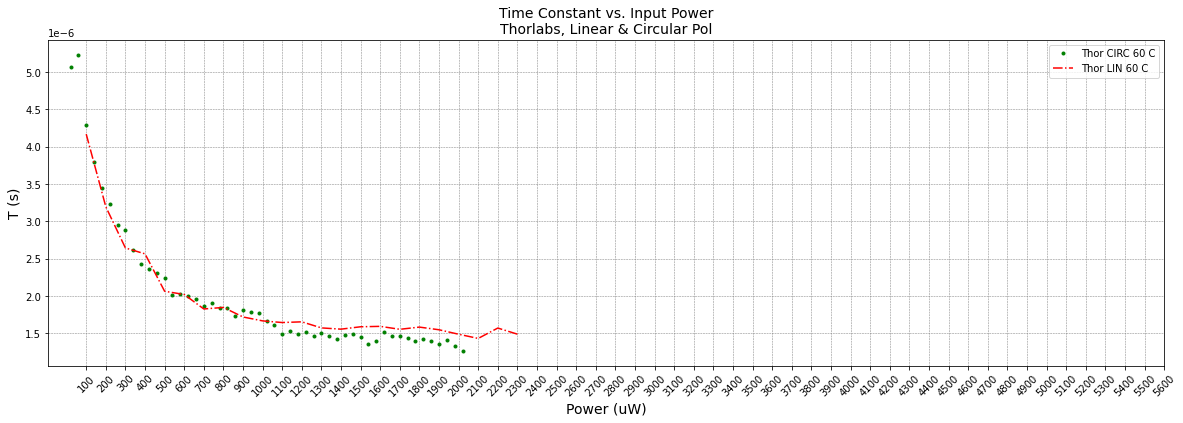

In [107]:
pwrs = [*range(100, 5700, 100)]
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

#PGB
BRANDLONG = 'PrecisionGlassBlowing'
BRAND='PGB'

# ax.plot(pwrs,globals()[BRAND+"LIN"+str(35)+'_T_list'], '--',label='PGB LIN 35 C')
# ax.plot(pwrs,globals()[BRAND+"LIN"+str(40)+'_T_list'], '--',label='PGB LIN 40 C')
# ax.plot([*range(700, 5700, 100)],globals()[BRAND+"LIN"+str(60)+'_T_list'], '--',label='PGB LIN 60 C')

# ax.plot(pwrs,globals()[BRAND+"CIRC"+str(35)+'_T_list'], '-',label='PGB CIRC 35 C')
# ax.plot(pwrs,globals()[BRAND+"CIRC"+str(40)+'_T_list'], '-',label='PGB CIRC 40 C')
# ax.plot([*range(200, 5700, 100)],globals()[BRAND+"CIRC"+str(60)+'_T_list'], '-',label='PGB CIRC 60 C')

#Thor
BRANDLONG = 'Thorlabs'
BRAND='Thor'

# ax.plot(range(100, 5700, 100),globals()[BRAND+'CIRC'+str(35)+'_T_list'], '.',label='Thor CIRC 35 C')
# ax.plot(pwrs,globals()[BRAND+'CIRC'+str(40)+'_T_list'], '.',label='Thor CIRC 40 C')
ax.plot(n,globals()[BRAND+'CIRC'+str(60)+'_T_list'], '.',label='Thor CIRC 60 C', color="green")

# ax.plot(range(100, 5700, 100),globals()[BRAND+"LIN"+str(35)+'_T_list'], '-.',label='Thor LIN 35 C')
# ax.plot(pwrs,globals()[BRAND+"LIN"+str(40)+'_T_list'], '-.',label='Thor LIN 40 C')
ax.plot(ThorLIN60pwrs,globals()[BRAND+"LIN"+str(60)+'_T_list'], '-.',label='Thor LIN 60 C', color="red")


ax.set_xlabel('Power (uW)', fontsize=14)
ax.set_ylabel('T (s)', fontsize=14)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(pwrs)
ax.set_xticklabels(pwrs,rotation=45)
# ax.set_yticks(circ_T_list)
# ax.set_yticklabels(circ_T_list)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="upper right")
ax.set_title('Time Constant vs. Input Power\nThorlabs, Linear & Circular Pol', fontsize=14)
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/TvPwr_100uWto5600uW_CIRC&LIN_PGB&Thor_60C.png")

In [26]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
BRANDS =[('PrecisionGlassBlowing', 'PGB')]
POLS = ['CIRC']
TEMPS = ['60']

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
            npydir = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/npy_files")
            globals()[BRAND+POL+TEMP+'_T_list'] = []
            for num in range(11):
                globals()[BRAND+POL+TEMP+'_T_list'].append(np.load(npydir+"/"+POL+'200uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
            print(len(globals()[BRAND+POL+TEMP+'_T_list']))

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/PrecisionGlassBlowing/CIRCPOL/60C_Phase_Locked_2/npy_files/CIRC200uW0_PGBCIRC60_best_vals.npy'

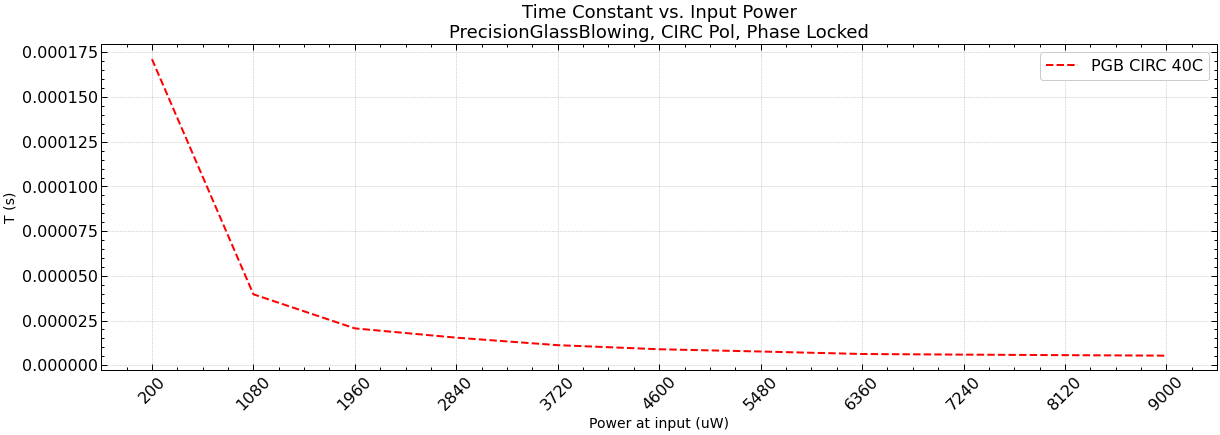

In [17]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
pwrs = [int(x) for x in np.linspace(200, 9000, 11)]
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
#             fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
            ax.plot(pwrs,globals()[BRAND+POL+str(TEMP)+'_T_list'], '--',label=BRAND+' '+POL+' '+TEMP+'C', color='red')

            ax.set_xlabel('Power at input (uW)', fontsize=14)
            ax.set_ylabel('T (s)', fontsize=14)
            ax.set_xticks(pwrs)
            ax.set_xticklabels(pwrs,rotation=45)
            # ax.invert_xaxis()
            ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
            ax.legend(loc="best")
            # ax.set_title(BRANDLONG+' Cell Transmission, 3 mW, 1.2 ms period',  fontsize=14)
            ax.set_title('Time Constant vs. Input Power\n'+BRANDLONG+', '+POL+' Pol, Phase Locked',  fontsize=18)
#             plt.show()
plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked/TvPwr_"+BRAND+"_"+TEMP+"C_Phase_Locked.png")

In [21]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
BRANDS =[('PrecisionGlassBlowing', 'PGB')]
POLS = ['CIRC']
TEMPS = ['40']

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
            npydir = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked/npy_files")
            globals()[BRAND+POL+TEMP+'_t_o_list'] = []
            for num in range(11):
                globals()[BRAND+POL+TEMP+'_t_o_list'].append(np.load(npydir+"/"+POL+'200uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
            print(len(globals()[BRAND+POL+TEMP+'_t_o_list']))
            
globals()[BRAND+POL+TEMP+'_t_o_list'] = np.array(globals()[BRAND+POL+TEMP+'_t_o_list'])

globals()[BRAND+POL+TEMP+'_t_o_list'] = globals()[BRAND+POL+TEMP+'_t_o_list']/0.1

type(globals()[BRAND+POL+TEMP+'_t_o_list'])

11


numpy.ndarray

In [16]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
BRANDS =[('PrecisionGlassBlowing', 'PGB')]
POLS = ['CIRC']
TEMPS = ['60']

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
            npydir = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/npy_files")
            globals()[BRAND+POL+TEMP+'_t_o_list'] = []
            for num in range(11):
                globals()[BRAND+POL+TEMP+'_t_o_list'].append(np.load(npydir+"/"+POL+'3650uW'+str(num)+'_'+BRAND+POL+TEMP+'_best_vals.npy')[2])
            print(len(globals()[BRAND+POL+TEMP+'_t_o_list']))

globals()[BRAND+POL+TEMP+'_t_o_list'] = np.array(globals()[BRAND+POL+TEMP+'_t_o_list'])

globals()[BRAND+POL+TEMP+'_t_o_list'] = globals()[BRAND+POL+TEMP+'_t_o_list']/0.1

type(globals()[BRAND+POL+TEMP+'_t_o_list'])

11


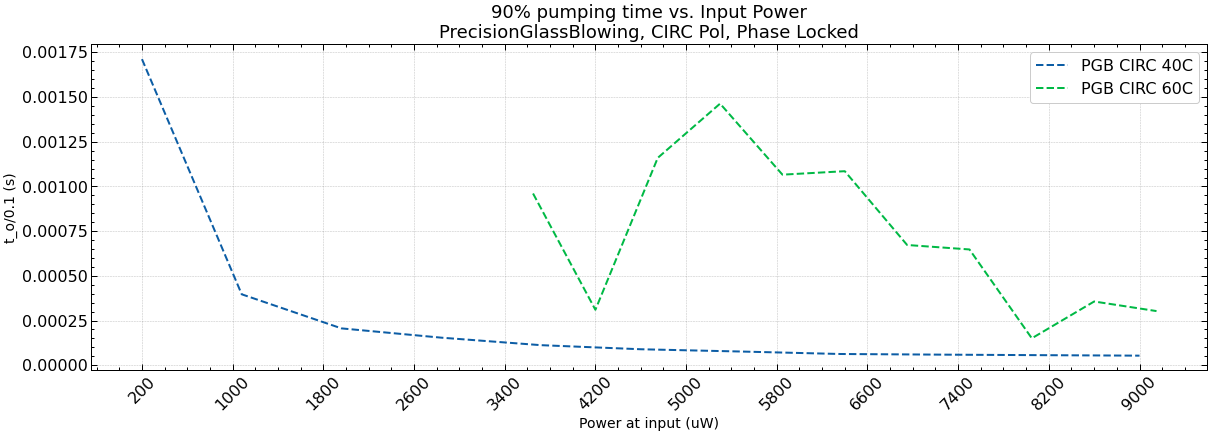

In [22]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
BRANDS =[('PrecisionGlassBlowing', 'PGB')]
POLS = ['CIRC']
pwr_tks = [int(i) for i in np.linspace(200, 9000,12)]

fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
pwrs_40 = [int(x) for x in np.linspace(200, 9000, 11)]
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)
# globals()[BRAND+POL+str(TEMP)+'_T_list'].pop(0)
# pwrs.pop(0)
pwrs_60 = [int(x) for x in np.linspace(3650, 9150, 11)]
TEMPS = [(pwrs_40,'40'), (pwrs_60,'60')]

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for pwrs, TEMP in TEMPS:
#             fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
            ax.plot(pwrs, globals()[BRAND+POL+str(TEMP)+'_t_o_list'], '--',label=BRAND+' '+POL+' '+TEMP+'C')

            ax.set_xlabel('Power at input (uW)', fontsize=14)
            ax.set_ylabel('t_o/0.1 (s)', fontsize=14)
            ax.set_xticks(pwr_tks)
            ax.set_xticklabels(pwr_tks,rotation=45)
            # ax.invert_xaxis()
            ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
            ax.legend(loc="best")
            # ax.set_title(BRANDLONG+' Cell Transmission, 3 mW, 1.2 ms period',  fontsize=14)
            ax.set_title('90% pumping time vs. Input Power\n'+BRANDLONG+', '+POL+' Pol, Phase Locked',  fontsize=18)
#             plt.show()
plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/t_ovPwr_"+BRAND+"_40C_60C_Phase_Locked.png")

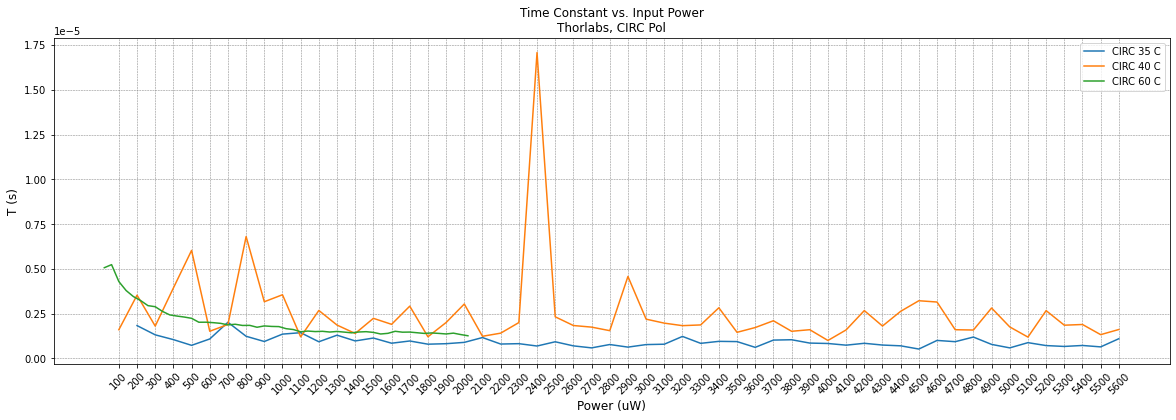

In [77]:
pwrs = [*range(100, 5700, 100)]
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')


ax.plot(range(200, 5700, 100),globals()[BRAND+POL+str(35)+'_T_list'], '-',label=POL+' 35 C')
ax.plot(pwrs,globals()[BRAND+POL+str(40)+'_T_list'], '-',label=POL+' 40 C')
ax.plot(n,globals()[BRAND+POL+str(60)+'_T_list'], '-',label=POL+' 60 C')


ax.set_xlabel('Power (uW)', fontsize=12)
ax.set_ylabel('T (s)', fontsize=12)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(pwrs)
ax.set_xticklabels(pwrs,rotation=45)
# ax.set_yticks(circ_T_list)
# ax.set_yticklabels(circ_T_list)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="upper right")
ax.set_title('Time Constant vs. Input Power\n'+BRANDLONG+', '+POL+' Pol')
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"+BRANDLONG+"/"+POL+"POL/TvPwr_100uWto5600uW_"+POL+"_"+BRAND+".png")

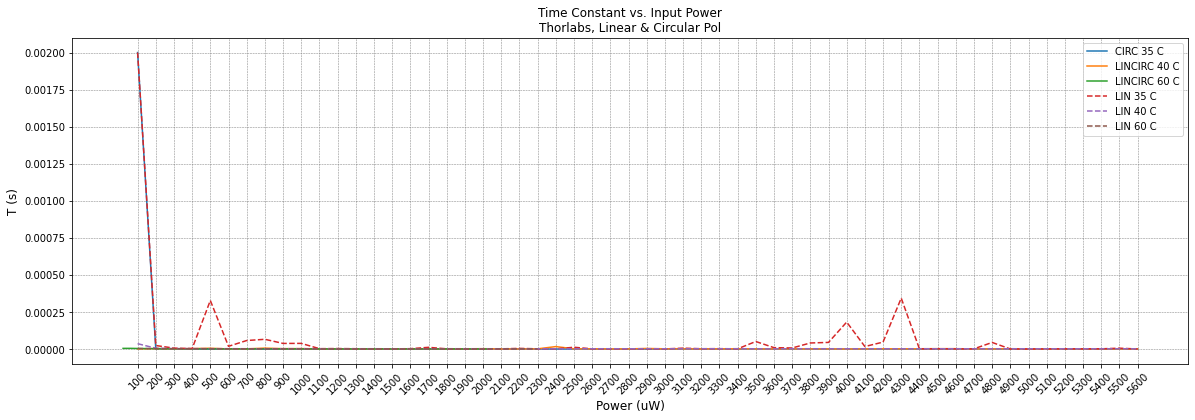

In [93]:
pwrs = [*range(100, 5700, 100)]
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

# #PGB
# ax.plot(pwrs,globals()[BRAND+"LIN"+str(35)+'_T_list'], '--',label='LIN 35 C')
# ax.plot(pwrs,globals()[BRAND+"LIN"+str(40)+'_T_list'], '--',label='LIN 40 C')
# ax.plot([*range(700, 5700, 100)],globals()[BRAND+"LIN"+str(60)+'_T_list'], '--',label='LIN 60 C')

# ax.plot(pwrs,globals()[BRAND+"CIRC"+str(35)+'_T_list'], '-',label='CIRC 35 C')
# ax.plot(pwrs,globals()[BRAND+"CIRC"+str(40)+'_T_list'], '-',label='CIRC 40 C')
# ax.plot([*range(200, 5700, 100)],globals()[BRAND+"CIRC"+str(60)+'_T_list'], '-',label='CIRC 60 C')

#Thor
ax.plot(range(100, 5700, 100),globals()[BRAND+'CIRC'+str(35)+'_T_list'], '-',label='CIRC 35 C')
ax.plot(pwrs,globals()[BRAND+'CIRC'+str(40)+'_T_list'], '-',label=POL+'CIRC 40 C')
ax.plot(n,globals()[BRAND+'CIRC'+str(60)+'_T_list'], '-',label=POL+'CIRC 60 C')

ax.plot(range(100, 5700, 100),globals()[BRAND+"LIN"+str(35)+'_T_list'], '--',label='LIN 35 C')
ax.plot(pwrs,globals()[BRAND+"LIN"+str(40)+'_T_list'], '--',label='LIN 40 C')
ax.plot(ThorLIN60pwrs,globals()[BRAND+"LIN"+str(60)+'_T_list'], '--',label='LIN 60 C')


ax.set_xlabel('Power (uW)', fontsize=12)
ax.set_ylabel('T (s)', fontsize=12)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(pwrs)
ax.set_xticklabels(pwrs,rotation=45)
# ax.set_yticks(circ_T_list)
# ax.set_yticklabels(circ_T_list)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="upper right")
ax.set_title('Time Constant vs. Input Power\n'+BRANDLONG+', Linear & Circular Pol')
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"+BRANDLONG+"/TvPwr_100uWto5600uW_CIRC&LIN_"+BRAND+".png")

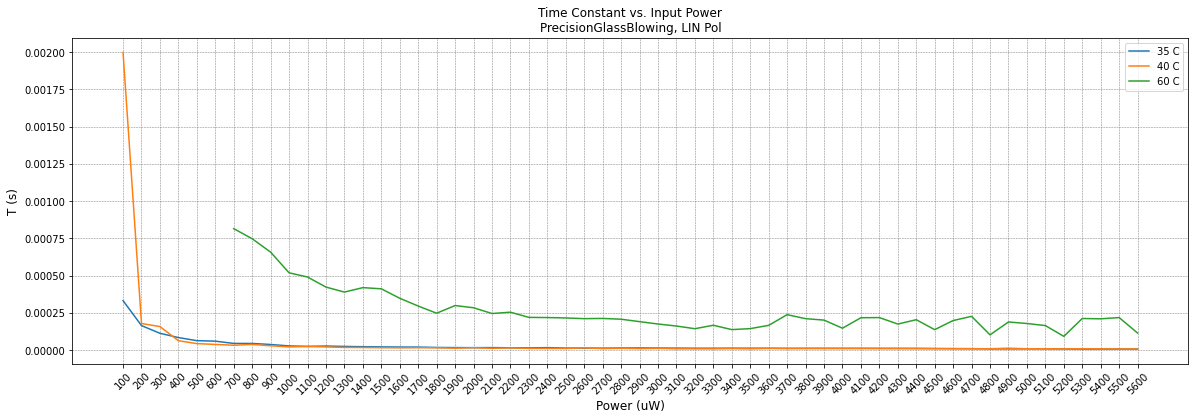

In [28]:
pwrs = [*range(100, 5700, 100)]
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(pwrs,globals()[BRAND+POL+str(35)+'_T_list'], '-',label='35 C')
ax.plot(pwrs,globals()[BRAND+POL+str(40)+'_T_list'], '-',label='40 C')
ax.plot([*range(700, 5700, 100)],globals()[BRAND+POL+str(60)+'_T_list'], '-',label='60 C')


ax.set_xlabel('Power (uW)', fontsize=12)
ax.set_ylabel('T (s)', fontsize=12)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(pwrs)
ax.set_xticklabels(pwrs,rotation=45)
# ax.set_yticks(circ_T_list)
# ax.set_yticklabels(circ_T_list)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="upper right")
ax.set_title('Time Constant vs. Input Power\n'+BRANDLONG+', '+POL+' Pol')
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"+BRANDLONG+"/"+POL+"POL/TvPwr_100uWto5600uW_"+POL+"_"+BRAND+".png")

In [44]:
circ_pwr_nums = [*range(20,2060,40)]
circ_T_list = []

lin_pwr_nums = [*range(100,2400, 100)]
lin_T_list = []

lin2_pwr_nums = [*range(100,2400, 100)]
lin2_T_list = []

lin3_pwr_nums = [*range(100,5700, 100)]
lin3_T_list = []


print(len(lin_pwr_nums), len(circ_pwr_nums))

for num in circ_pwr_nums:
    circ_T_list.append(np.load("CIRC"+str(num)+'uW0_best_vals.npy')[2])
print(len(circ_T_list))

for num in lin_pwr_nums:
    lin_T_list.append(np.load("LIN"+str(num)+'uW0_best_vals.npy')[2])
print(len(lin_T_list))

for num in lin2_pwr_nums:
    lin2_T_list.append(np.load("LIN"+str(num)+'uW0_2_best_vals.npy')[2])
print(len(lin2_T_list))

for num in lin3_pwr_nums:
    lin3_T_list.append(np.load("LIN"+str(num)+'uW0_3_best_vals.npy')[2])
print(len(lin3_T_list))

23 51
51
23
23
56


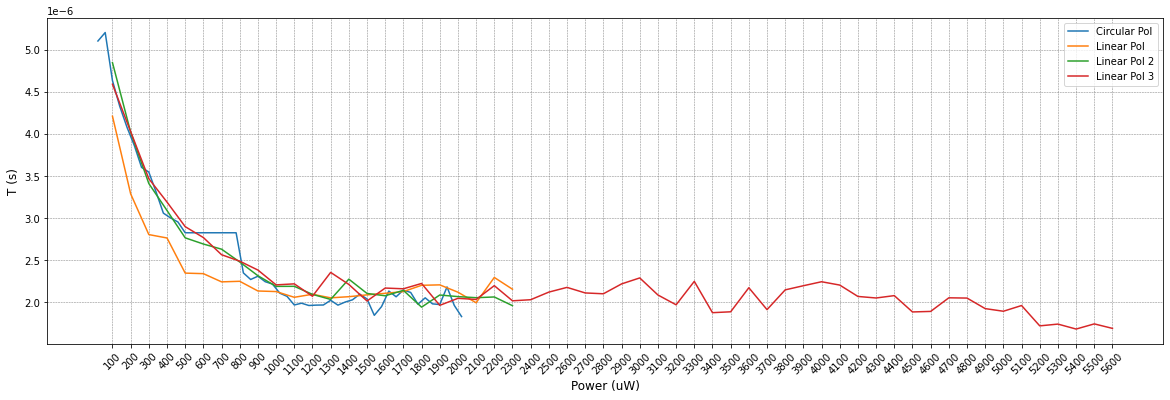

In [45]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(circ_pwr_nums,circ_T_list, '-',label='Circular Pol')
ax.plot(lin_pwr_nums,lin_T_list, '-',label='Linear Pol')
ax.plot(lin2_pwr_nums,lin2_T_list, '-',label='Linear Pol 2')
ax.plot(lin3_pwr_nums,lin3_T_list, '-',label='Linear Pol 3')

ax.set_xlabel('Power (uW)', fontsize=12)
ax.set_ylabel('T (s)', fontsize=12)
# ax.set_xlim(0.1*10**(-6),4*(10**(-5)))
#ax.set_ylim(40000,60000)
# ax.set_yticks(ax.get_yticks()[::0.5])
ax.set_xticks(lin3_pwr_nums)
ax.set_xticklabels(lin3_pwr_nums,rotation=45)
# ax.set_yticks(circ_T_list)
# ax.set_yticklabels(circ_T_list)
ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="upper right")
# plt.savefig('/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/LINPOL3/60C0dB/TvPwr_1CIRC_3LIN.png')
# plt.savefig('/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/LINPOL2/60C0dB/TvPwr_all3.png')
# pwr_nums = [500, 540, 580, 620, 660, 700, 740, 780, 820, 860,900,940,980,1200,1600,2000,2400]

In [76]:
def efunc(i):
#     return 0.06*(1-1*np.exp(-(i-(60*(10**(-6))))/(50*(10**(-6)))))
    0.06*(1-1*((30*10**-6)/abs(i-60*10**-6)))

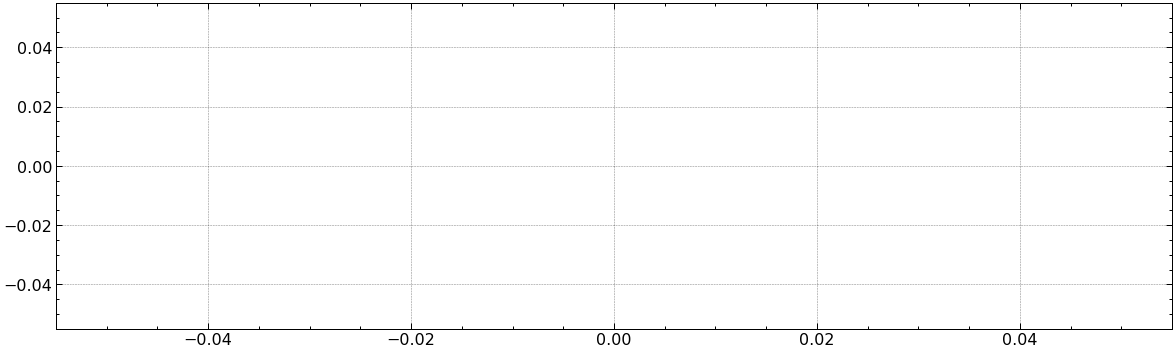

In [78]:
# a*(1-b*np.exp(-(t-t_o)/T))
# T=(10*10**(-6))
# t_o=(1*10**(-6))-50*10**-6

#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, 10*10**(-6),1*10**(-6)], bounds=(0,(5.0,1.0,0.002,1*10**(-5))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))-(4950*(10**(-6))),(1*10**(-6))-(4950*(10**(-6)))], bounds=(0,(5.0,1.0,0.002,1*10**(-5))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))+offset,(1*10**(-6))+offset], bounds=((0,0,0.002+offset-p,(1*10**(-5))+offset-p),(5.0,1.0,0.002+offset,(1*10**(-5))+offset)))
# best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'], p0 = [0.06, 1.0, T, t_o], bounds=(0,(np.inf,np.inf,np.inf,np.inf)))    


fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
x = [x for x in np.linspace(0,50)]
y = [efunc(i) for i in x]
ax.plot(x, y)

ax.grid(True)


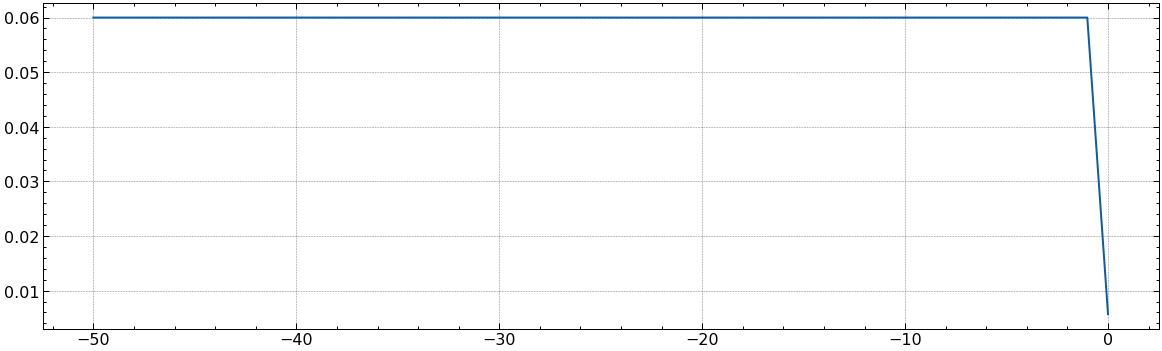

In [79]:
# a*(1-b*np.exp(-(t-t_o)/T))
T=(10*10**(-6))
t_o=(1*10**(-6))

#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, 10*10**(-6),1*10**(-6)], bounds=(0,(5.0,1.0,0.002,1*10**(-5))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))-(4950*(10**(-6))),(1*10**(-6))-(4950*(10**(-6)))], bounds=(0,(5.0,1.0,0.002,1*10**(-5))))
#     best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'],p0 = [0.06, 1.0, (10*10**(-6))+offset,(1*10**(-6))+offset], bounds=((0,0,0.002+offset-p,(1*10**(-5))+offset-p),(5.0,1.0,0.002+offset,(1*10**(-5))+offset)))
# best_vals, covar = curve_fit(func, data['Time(s)'], data['CH2(V)'], p0 = [0.06, 1.0, T, t_o], bounds=(0,(np.inf,np.inf,np.inf,np.inf)))    


fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
x = [x for x in np.linspace(-50,0)]
y = [inv_exp(i, 0.06, 1.0, T, t_o) for i in x]
ax.plot(x, y)
# tick_spacing = 0.0005
# import matplotlib.ticker as ticker
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax.set_xlim(1.1*(10**(-6)), (2*(10**(-6))))
# ax.set_xlim(0,1.3*(10**(-6)))
#ax.set_ylim(40000,60000)
ax.grid(True)
# ax.set_xlim(0-(5000*(10**(-6))), (0*(10**(-6))))

# plt.savefig()

/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/PrecisionGlassBlowing/CIRCPOL/60C_Phase_Locked_2/CIRC3650uW0.csv
Fri Dec 23 17:11:47 2022


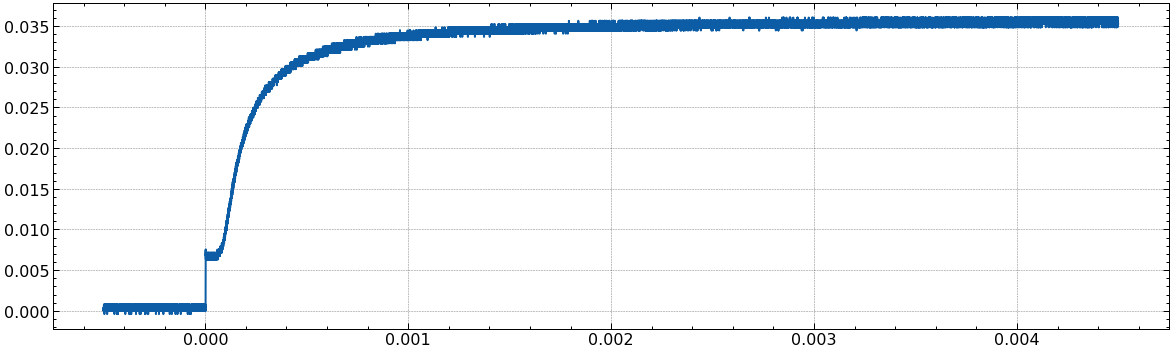

In [103]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
POL = 'CIRC'
TEMP = '60'
num = 0
file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/"+POL+str(3650)+"uW"+str(num)+".csv")
print(file1)
# file1 = file1.replace("\\", "/")
print(time.ctime())
data = pd.read_csv(file1)

fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(data['Time(s)'], data['CH2(V)'], '-')
# tick_spacing = 0.0005
# import matplotlib.ticker as ticker
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax.set_xlim(1.1*(10**(-6)), (2*(10**(-6))))
# ax.set_xlim(0,1.3*(10**(-6)))
#ax.set_ylim(40000,60000)
ax.grid(True)
# ax.set_xlim(0-(5000*(10**(-6))), (0*(10**(-6))))

# plt.savefig()

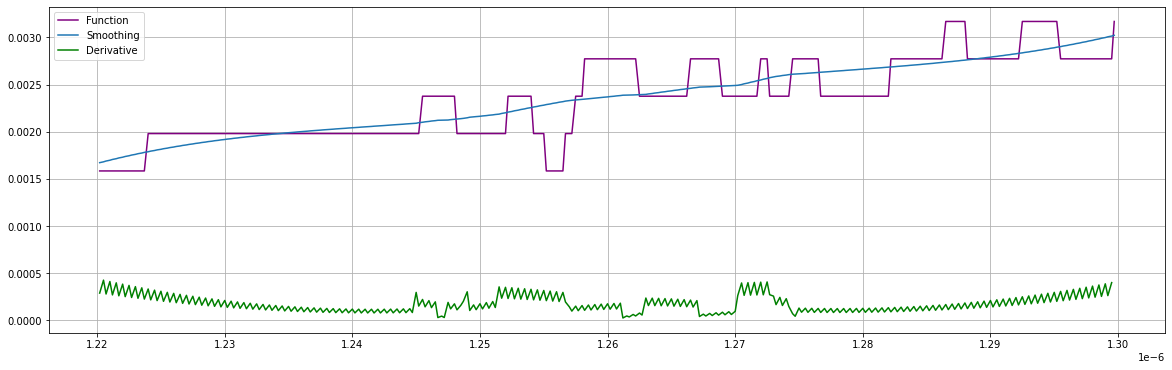

In [129]:
from numpy import diff
deriv_cut = data[(data['Time(s)'] < 1.3*(10**(-6))) & (data['Time(s)'] > 1.22*(10**(-6)))]

  
# plotting the function
plt.plot(deriv_cut['Time(s)'], deriv_cut['CH2(V)'], color='purple', label='Function')
  
# plotting its derivative
from scipy.signal import savgol_filter

window = 200
order = 3
y_sf = savgol_filter(deriv_cut['CH2(V)'], window, order)
plt.plot(deriv_cut['Time(s)'], y_sf, label='Smoothing')


dydx = (diff(y_sf)/diff(deriv_cut['Time(s)']))
deriv_cut = deriv_cut[:-1]
plt.plot(deriv_cut['Time(s)'], dydx/(1*10**(8)),color='green', label='Derivative')
  
# formatting
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [331]:
# data['Time(s)'] = data['Time(s)']+(5000*(10**(-6)))

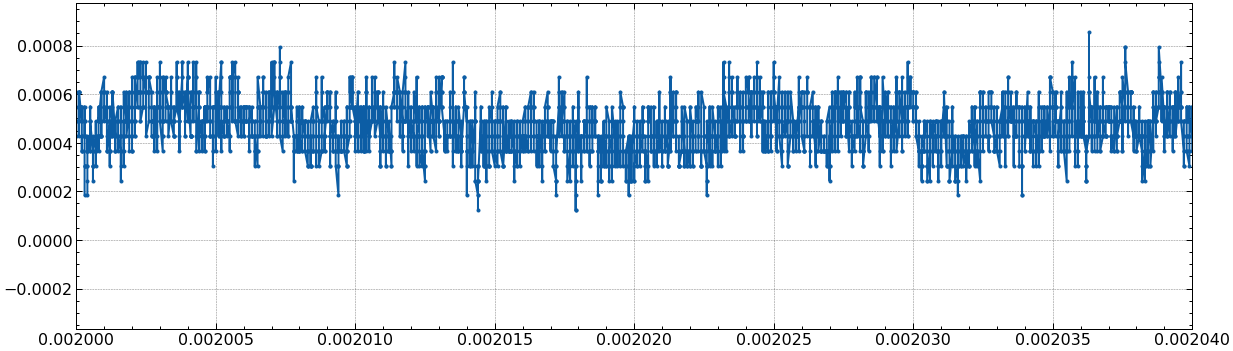

In [332]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(data['Time(s)'], data['CH2(V)'], '.-')
# tick_spacing = 0.0005
# import matplotlib.ticker as ticker
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlim(0.002, 0.00204)
# ax.set_xlim(0,1.3*(10**(-6)))
#ax.set_ylim(40000,60000)
ax.grid(True)

[3.60736478e-02 8.02519194e-01 9.60556532e-05] [[1.32485769e-13 1.66150834e-19 1.38814388e-15]
 [1.66150834e-19 8.06890909e-25 6.74135473e-21]
 [1.38814388e-15 6.74135473e-21 5.63221906e-17]]


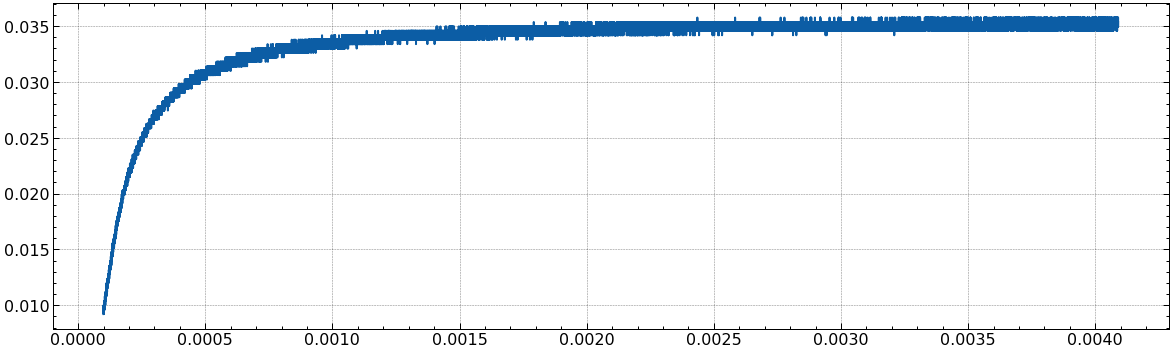

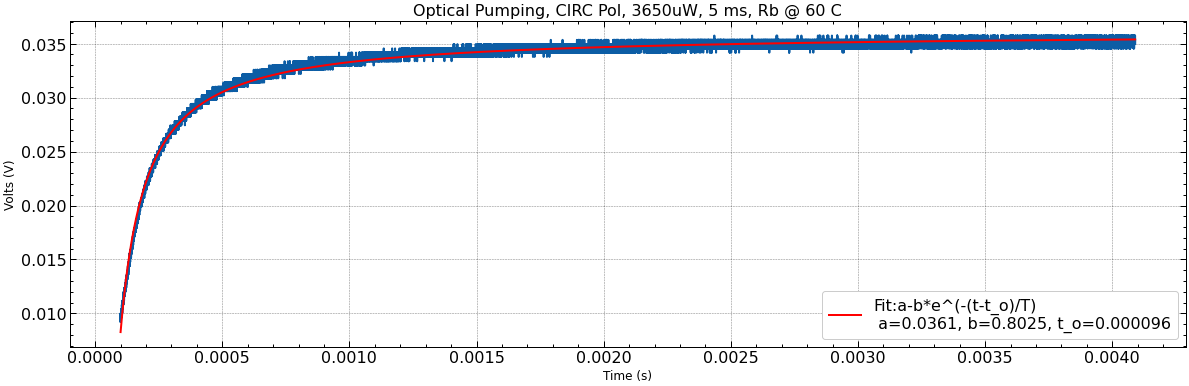

In [106]:
#  Params for datasets 0-4
# data2 = cut(data, data['Time(s)'].min(), 0-(5000*(10**(-6))))
# data3  = dfconcat(data, data2, 0-(4950*(10**(-6))), 0-20*10**-6)

#  Params for datasets 5-10
# data2 = cut(data, data['Time(s)'].min(), 0)
# data3  = dfconcat(data, data2, 1.235*(10**(-6)), 4090*10**-6)


data2 = cut(data, data['Time(s)'].min(), 0)
data3  = dfconcat(data, data2, 100*(10**(-6)), 4090*10**-6)

fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(data3['Time(s)'], data3['CH2(V)'], '-')
# ax.set_xlim(0-(5000*(10**(-6))), (0*(10**(-6))))

# filenum = 0
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
POL = 'CIRC'
TEMP = '60' 

# pwrs = [int(x) for x in np.linspace(2000,7500,11)]
# pwrs = [int(x) for x in np.linspace(200, 9000, 11)]
pwrs = [int(x) for x in np.linspace(3650, 9150, 11)]

# make new folder if not exists
npydir = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/npy_files")
if not os.path.exists(npydir):
    os.mkdir(npydir)

fit(data3, file1, npydir, asymtotic, pwrs[num], TEMP, POL, BRAND)

In [21]:
print('data3: ', np.isinf(data3).values.sum(), data3.isnull().sum().sum(), data3.isnull().values.any())

data3:  0 0 False


In [20]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
POL = 'CIRC'
TEMP = '60' 


# for num in filenums:
file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked_2/Transmission_"+BRAND+"_"+TEMP+"C_Phase_Locked.xlsx")
# file1_f = (f"/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#          +f"{BRANDLONG}/{POL}POL/{TEMP}C_Phase_Locked/Transmission_{BRAND}_{TEMP}C_Phase_Locked.xlsx")
# Transmission_relataxion_time_CIRC_35C.xlsx
# Transmission_PGB_35C.xlsx
# 60C_Phase_Locked
# Transmission_Thor_60C_Phase_Locked

dataframe1 = pd.read_excel(file1)
 
# print(dataframe1)

dataframe1['Transmission (%)'] = (dataframe1['Cell (mV_pp)'] / dataframe1['No Cell (mV_pp)'])*100

In [21]:
BRANDLONG = 'PrecisionGlassBlowing'
BRAND = 'PGB'
POL = 'CIRC'
TEMP = '40' 


# for num in filenums:
file2 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C_Phase_Locked/Transmission_"+BRAND+"_"+TEMP+"C_Phase_Locked.xlsx")
# file1_f = (f"/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#          +f"{BRANDLONG}/{POL}POL/{TEMP}C_Phase_Locked/Transmission_{BRAND}_{TEMP}C_Phase_Locked.xlsx")
# Transmission_relataxion_time_CIRC_35C.xlsx
# Transmission_PGB_35C.xlsx
# 60C_Phase_Locked
# Transmission_Thor_60C_Phase_Locked

dataframe2 = pd.read_excel(file2)
 
# print(dataframe2)

dataframe2['Transmission (%)'] = (dataframe2['Cell (mV_pp)'] / dataframe2['No Cell (mV_pp)'])*100

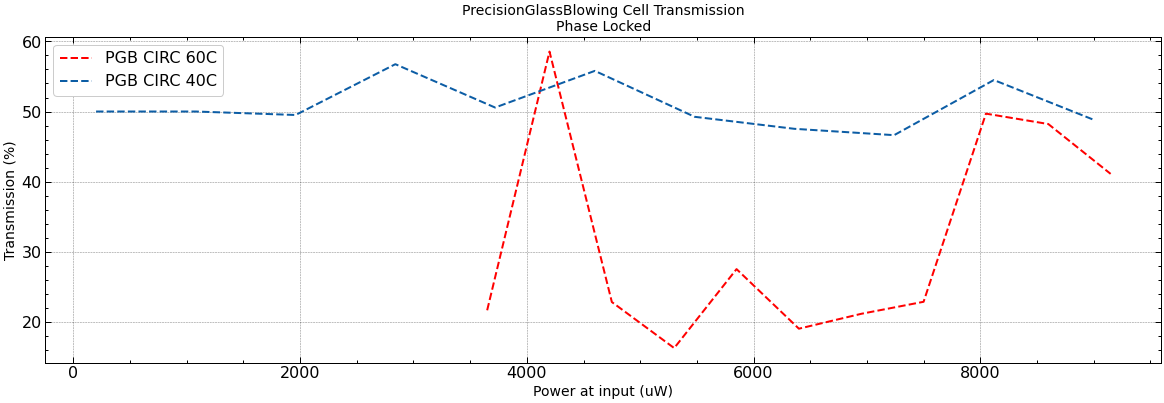

In [24]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
ax.plot(dataframe1['Pwr (uW)'] , dataframe1['Transmission (%)'], '--',label=BRAND+' '+POL+' 60C',color='red')
ax.plot(dataframe2['Pwr (uW)'] , dataframe2['Transmission (%)'], '--',label='PGB CIRC 40C')
ax.set_xlabel('Power at input (uW)', fontsize=14)
ax.set_ylabel('Transmission (%)', fontsize=14)
# ax.invert_xaxis()
# ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
ax.legend(loc="best")
ax.set_title(BRANDLONG+' Cell Transmission\nPhase Locked',  fontsize=14)
# plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#              +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_PGB_"+TEMP+"C.png")

plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/Transmission_"+BRAND+"_Phase_Locked_40C_60C.png")

In [107]:
def transmission(file, BRAND, POL, TEMP):
    globals()[BRAND+POL+TEMP+"_df"] = pd.read_excel(file)
    globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'] = (globals()[BRAND+POL+TEMP+"_df"]['Cell (mV_pp)'] / globals()[BRAND+POL+TEMP+"_df"]['No Cell (mV_pp)'])*100
    return None

In [110]:
BRANDS =[('PrecisionGlassBlowing', 'PGB'), ('Thorlabs', 'Thor')]
POLS = ['CIRC', 'LIN']
TEMPS = ['35','40','60']

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
            file1 = ("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
             +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_"+BRAND+"_"+TEMP+"C.xlsx")
            transmission(file1, BRAND, POL, TEMP)

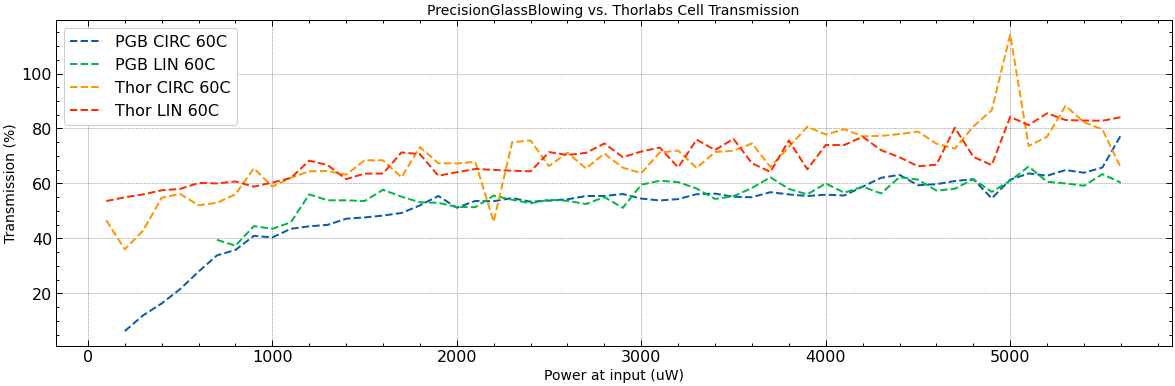

In [114]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
# BRANDLONG = 'PrecisionGlassBlowing'
# BRAND='PGB'
# POL='CIRC'
# TEMP='35'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='40'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='60'
# ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# POL='LIN'
# TEMP='35'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='40'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='60'
# ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')

# BRANDLONG = 'Thorlabs'
# BRAND='Thor'
# POL='CIRC'
# TEMP='35'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='40'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='60'
# ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# POL='LIN'
# TEMP='35'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='40'
# # ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')
# TEMP='60'
# ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')

BRANDS =[('PrecisionGlassBlowing', 'PGB'), ('Thorlabs', 'Thor')]
POLS = ['CIRC', 'LIN']
TEMPS = ['60']

for BRANDLONG, BRAND in BRANDS:
    for POL in POLS:
        for TEMP in TEMPS:
#             fig, ax = plt.subplots(figsize = (20,6), facecolor='w')
            ax.plot(globals()[BRAND+POL+TEMP+"_df"]['Pwr (uW)'] , globals()[BRAND+POL+TEMP+"_df"]['Transmission (%)'], '--',label=BRAND+' '+POL+' '+TEMP+'C')

            ax.set_xlabel('Power at input (uW)', fontsize=14)
            ax.set_ylabel('Transmission (%)', fontsize=14)
            # ax.invert_xaxis()
            # ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
            ax.legend(loc="best")
            # ax.set_title(BRANDLONG+' Cell Transmission, 3 mW, 1.2 ms period',  fontsize=14)
            ax.set_title('PrecisionGlassBlowing vs. Thorlabs Cell Transmission',  fontsize=14)
#             ax.set_title(BRANDLONG+' Cell Transmission',  fontsize=14)
            # plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
            #              +BRANDLONG+"/"+POL+"POL/relaxation_time_"+TEMP+"C/Transmission_relataxion_time_60C.png")
#             plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/Transmission_60C.png")
#             plt.savefig("/mnt/e/Google_Drive_Backup_E/Data/Magnetometery/OpticalPumping/"
#                          +BRANDLONG+"/"+POL+"POL/"+TEMP+"C/Transmission_"+BRAND+"_"+TEMP+"C.png")
#             plt.show()